In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

%matplotlib inline

In [11]:
url_file2 = "../data/raw_data_txt/df_final_web_data_pt_2.txt"
url_file1 = "../data/raw_data_txt/df_final_web_data_pt_1.txt"
url_experi = "../data/raw_data_txt/df_final_experiment_clients.txt"
url_demo = "../data/raw_data_txt/df_final_demo.txt"

df_file2 = pd.read_csv(url_file2)
df_file1 = pd.read_csv(url_file2)
df_experi = pd.read_csv(url_experi)
df_demo = pd.read_csv(url_demo)

In [12]:
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [13]:
df_demo.duplicated().any

<bound method Series.any of 0        False
1        False
2        False
3        False
4        False
         ...  
70604    False
70605    False
70606    False
70607    False
70608    False
Length: 70609, dtype: bool>

In [14]:
df_demo.head

<bound method NDFrame.head of        client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0         836976             6.0              73.0      60.5     U        2.0   
1        2304905             7.0              94.0      58.0     U        2.0   
2        1439522             5.0              64.0      32.0     U        2.0   
3        1562045            16.0             198.0      49.0     M        2.0   
4        5126305            12.0             145.0      33.0     F        2.0   
...          ...             ...               ...       ...   ...        ...   
70604    7993686             4.0              56.0      38.5     U        3.0   
70605    8981690            12.0             148.0      31.0     M        2.0   
70606     333913            16.0             198.0      61.5     F        2.0   
70607    1573142            21.0             255.0      68.0     M        3.0   
70608    5602139            21.0             254.0      59.5     F        3.0  

In [15]:
df_demo.shape

(70609, 9)

In [16]:
df_demo.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [17]:
#frequency of age that uses web the most
frequency_age = df_demo['clnt_age'].value_counts()
frequency_age 

clnt_age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
       ... 
96.0      2
14.0      2
94.5      1
95.5      1
13.5      1
Name: count, Length: 165, dtype: int64

In [18]:
# idea of age range using web
age_table = pd.crosstab(index = df_demo["clnt_age"], columns="count")      
age_table

col_0,count
clnt_age,
13.5,1
14.0,2
14.5,23
15.0,22
15.5,37
...,...
93.5,4
94.0,3
94.5,1


In [19]:
#mean age using web
mean_age = df_demo['clnt_age'].mean()
print(mean_age)

46.442240133722414


In [20]:
#mode age using web
mode_age = df_demo['clnt_age'].mean()
print(mode_age)

46.442240133722414


In [21]:
#min/max age using web
min_age = df_demo['clnt_age'].min()
max_age = df_demo['clnt_age'].max()
print(min_age)
print(max_age) 

13.5
96.0


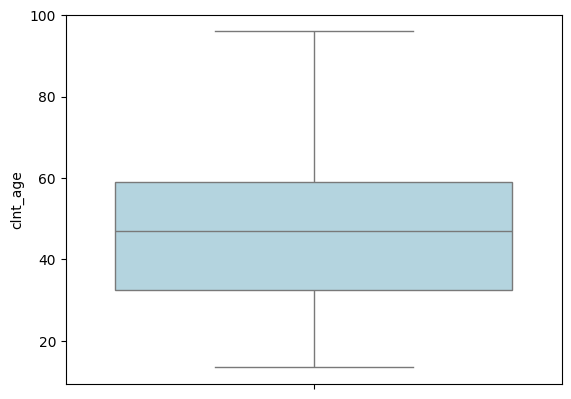

In [22]:
# mean age box plot
sns.boxplot(data = df_demo['clnt_age'], color="lightblue")
plt.show()

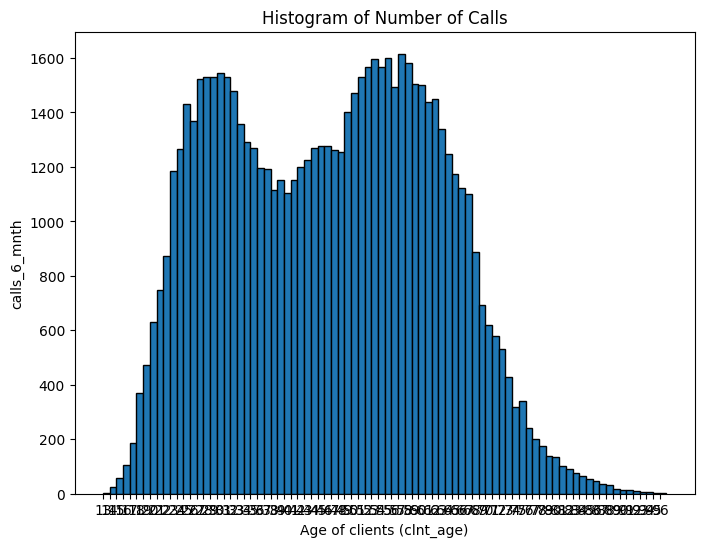

In [23]:
#calls per clt age in 6 months
plt.figure(figsize=(8,6))
plt.hist(df_demo['clnt_age'], 
         bins=range(int(df_demo['clnt_age'].min()), int(df_demo['clnt_age'].max())+2), 
         edgecolor='black')
plt.xlabel("Age of clients (clnt_age)")
plt.ylabel("calls_6_mnth")
plt.title("Histogram of Number of Calls")
plt.xticks(range(int(df_demo['clnt_age'].min()), int(df_demo['clnt_age'].max())+1))
plt.show()

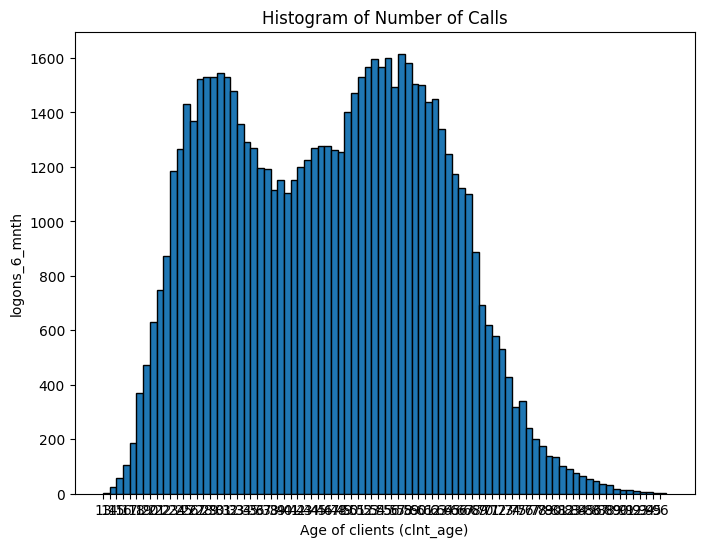

In [24]:
#logons per clt age in 6 months
plt.figure(figsize=(8,6))
plt.hist(df_demo['clnt_age'], 
         bins=range(int(df_demo['clnt_age'].min()), int(df_demo['clnt_age'].max())+2), 
         edgecolor='black')
plt.xlabel("Age of clients (clnt_age)")
plt.ylabel("logons_6_mnth")
plt.title("Histogram of Number of Calls")
plt.xticks(range(int(df_demo['clnt_age'].min()), int(df_demo['clnt_age'].max())+1))
plt.show()

In [25]:
#age and crosstab month tenure
crosstab_age_mth = pd.crosstab(df_demo['clnt_age'], df_demo['clnt_tenure_mnth'])

crosstab_age_mth

clnt_tenure_mnth,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,...,613.0,614.0,624.0,631.0,655.0,661.0,667.0,668.0,669.0,749.0
clnt_age,,,,,,,,,,,,,,,,,,,,,
13.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14.5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15.0,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#age and crosstab  year tenure
crosstab_age_yr = pd.crosstab(df_demo['clnt_age'], df_demo['clnt_tenure_yr'])

crosstab_age_yr

clnt_tenure_yr,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...,46.0,47.0,48.0,49.0,50.0,51.0,52.0,54.0,55.0,62.0
clnt_age,,,,,,,,,,,,,,,,,,,,,
13.5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14.5,1,0,9,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15.0,0,4,6,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15.5,0,0,11,9,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93.5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
94.0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


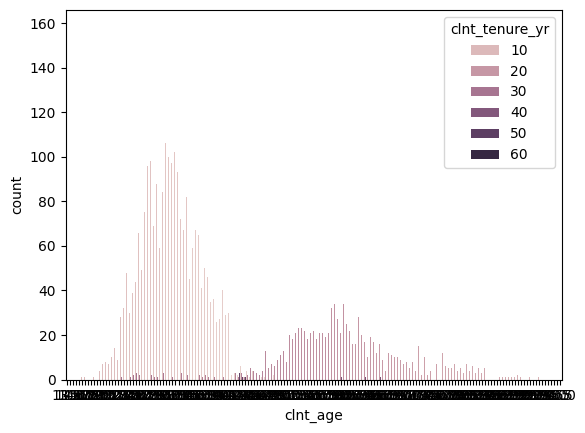

In [27]:
#age and year tenure
sns.countplot(data=df_demo, x='clnt_age', hue='clnt_tenure_yr')
plt.show()

/var/folders/2n/vdp8fcl915n4gbp1vcj_4vgw0000gp/T/ipykernel_87159/1793557032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_demo, x='clnt_age', y='clnt_tenure_yr', palette="coolwarm")


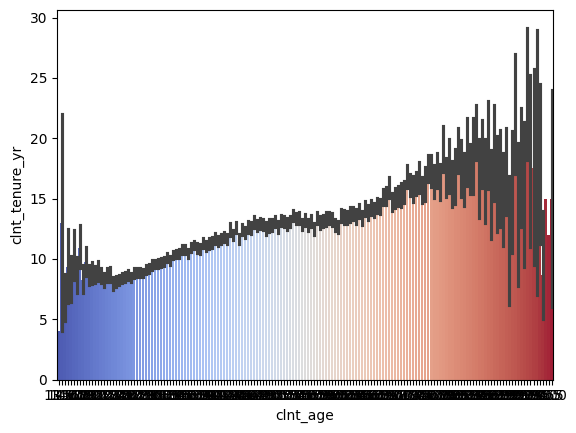

In [29]:
# Plotting a bar plot to visualize the age 'clnt_age' for each 'clnt_tenure_yr' category, using the "coolwarm" color palette
sns.barplot(data=df_demo, x='clnt_age', y='clnt_tenure_yr', palette="coolwarm")
plt.show()

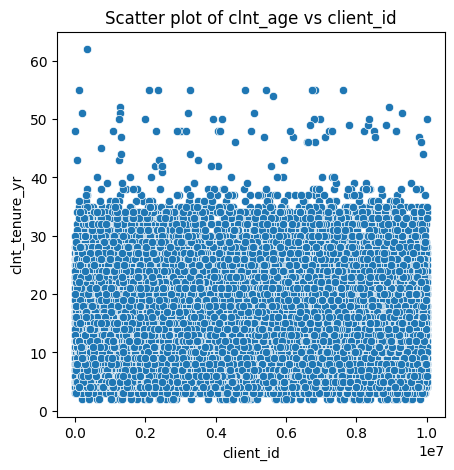

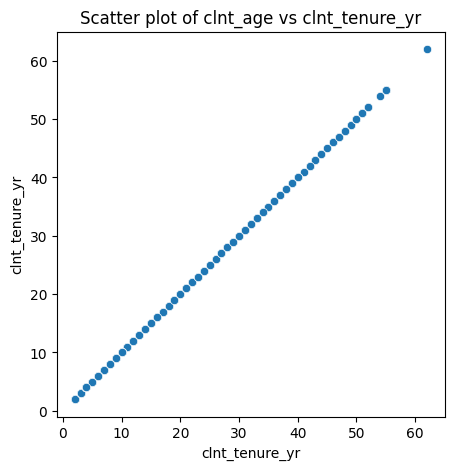

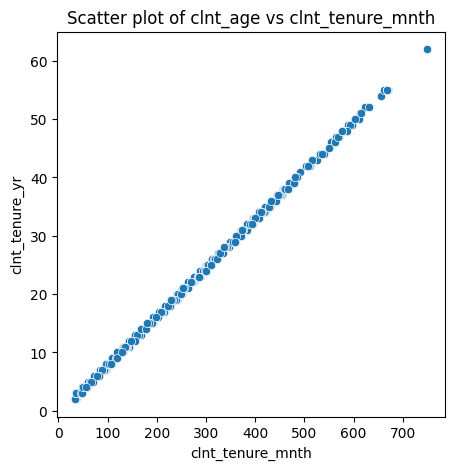

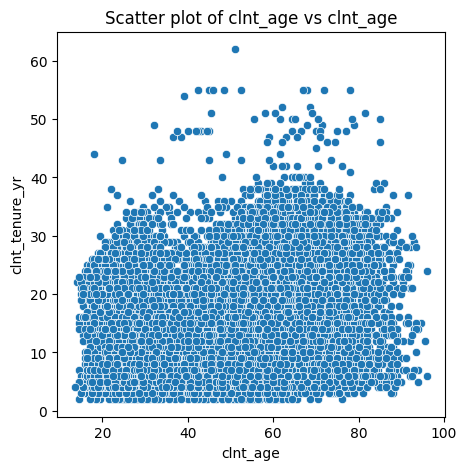

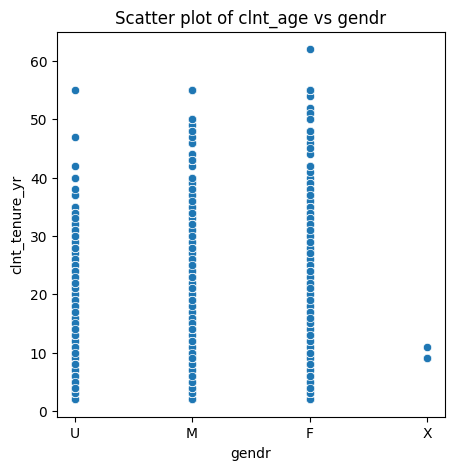

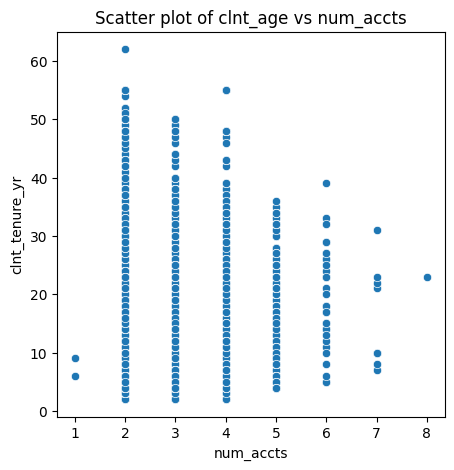

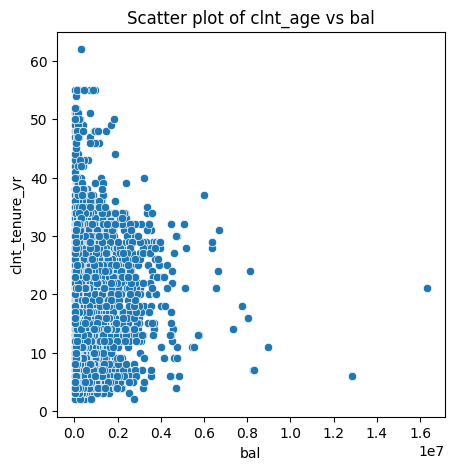

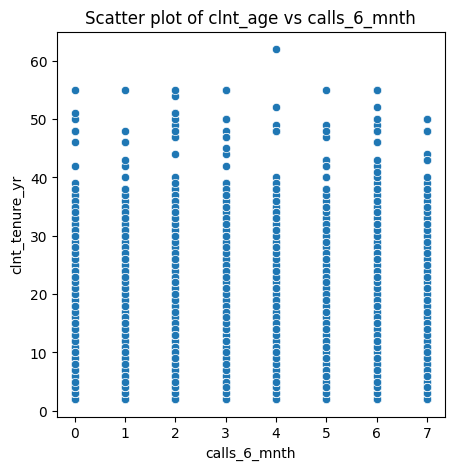

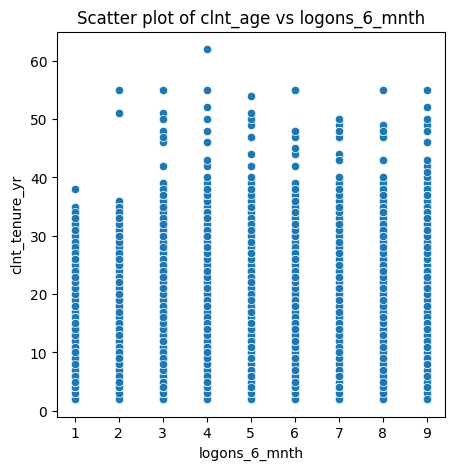

In [30]:
# Plotting scatter plots for each 'clnt_age' and clnt_tenure_yr to visualize their relationships
for col in df_demo.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of clnt_age vs ' + col)
    sns.scatterplot(data=df_demo, x=col, y='clnt_tenure_yr')
    plt.show()